In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from tenserflow.keras.datasets import mnist

In [27]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

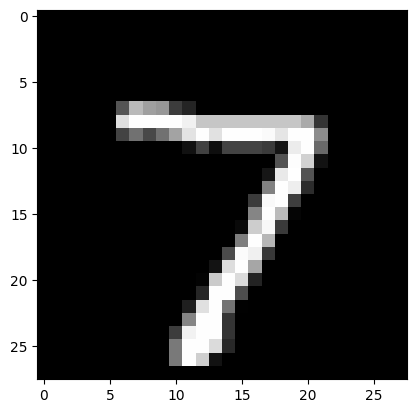

In [24]:
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))

In [25]:
x_train.shape[0]


10000

In [33]:
x_train,x_test = x_train/255.0,x_test / 255.0

In [85]:
x_train = x_train.reshape((x_train.shape[0],28*28))
x_test = x_test.reshape((x_test.shape[0],28*28))



In [37]:
from sklearn.linear_model import LogisticRegression




In [56]:
logreg = LogisticRegression(max_iter=100)

In [62]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [58]:
logreg.fit(x_train,y_train)
y_pred_logreg = logreg.predict(x_test)

accuracy_logreg = accuracy_score(y_test,y_pred_logreg)
print('Logistics Regresiion Accuracy:',accuracy_logreg)

Logistics Regresiion Accuracy: 0.9258


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
cm_svc = confusion_matrix(y_test,y_pred_logreg)

In [65]:
import seaborn as sns


<Axes: >

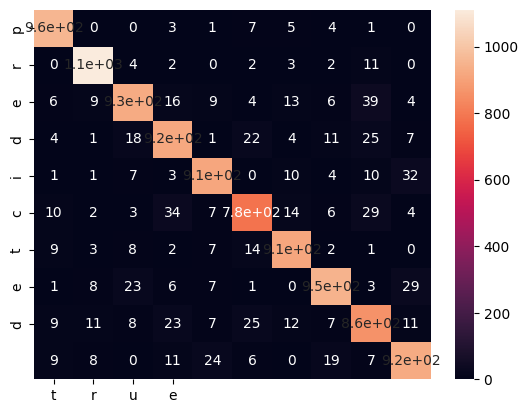

In [67]:

sns.heatmap(cm_svc,annot = True, xticklabels='true',yticklabels = 'predicted')


In [73]:
from sklearn.svm import SVC
svc = SVC(max_iter= 100)

svc.fit(x_train,y_train)

y_pred_svc = svc.predict(x_test)

#calc accuracy
accuracy_svc = confusion_matrix(y_test,y_pred_svc)

#calc confusion matrix 
cm_svc = confusion_matrix(y_test,y_pred_svc)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [77]:
import tensorflow as tf
from tensorflow.keras.layers import Dense 
from tensorflow.keras.models import Sequential

In [78]:
model = Sequential()

model.add(Dense(128,activation="relu", input_shape=(28*28, ) ))
model.add(Dense(64,activation="relu",  ))
model.add(Dense(10,activation="softmax",  ))



In [89]:
x_train,x_test = x_train/255.0,x_test/255.0
x_train = x_train.reshape((x_train.shape[0],28*28))
x_test = x_test.reshape((x_test.shape[0],28*28))

In [93]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics= ['accuracy'])

model.fit(
    x_train,
    y_train,
    epochs=2,
    batch_size=32,
    validation_data=(x_test,y_test)
)

Epoch 1/2
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3296 - accuracy: 0.9050 - val_loss: 0.2969 - val_accuracy: 0.9117
Epoch 2/2
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2883 - accuracy: 0.9158 - val_loss: 0.2666 - val_accuracy: 0.9222


In [101]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [102]:
test_loss,test_acc = model.evaluate(x_test,y_test)
y_pred_nn = model.predict(x_test)
f1_score_nn = f1_score(y_test,
                       np.argmax(y_pred_nn,axis=1),
                       average = 'weighted')
precision = precision_score(y_test,
                            np.argmax(y_pred_nn,axis = 1),
                            average = 'weighted')

recall = recall_score(y_test,np.argmax(y_pred_nn,axis=1),average = 'weighted')

#print the results
print('NN Loss:',test_loss)
print('NN Accuracy:',test_acc)
print('NN F1 score:',f1_score_nn)
print('NN Precision:',precision)
print('NN Recall score:',recall)





313/313 [==============================] - 1s 2ms/step
NN Loss: 0.2666165232658386
NN Accuracy: 0.9222000241279602
NN F1 score: 0.9219577734853165
NN Precision: 0.9223138292008946
NN Recall score: 0.9222


In [103]:
from sklearn.metrics import classification_report

In [104]:
cr = classification_report(y_test,np.argmax(y_pred_nn,axis=1))
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.92      1032
           3       0.89      0.92      0.91      1010
           4       0.92      0.94      0.93       982
           5       0.87      0.88      0.87       892
           6       0.96      0.93      0.95       958
           7       0.92      0.93      0.93      1028
           8       0.91      0.85      0.88       974
           9       0.92      0.89      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

